In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Dataset aggregated by qid

In [2]:
# df = pd.read_csv("medicare_aggregated_qid.csv")
# df = pd.read_csv('merged_med_seasonal_2011_2012.csv').drop(columns='Unnamed: 0')
# df = pd.read_csv('merged_med_seasonal_2011_2016_v2.csv').drop(columns='Unnamed: 0')
# df_yearly = pd.read_csv('../zip_train_yearly.csv').drop(columns='Unnamed: 0')

# df_monthly = pd.read_csv('../merged_df3_monthly.csv').drop(columns='Unnamed: 0')
df_yearly = pd.read_csv('../data/merged_df3.csv').drop(columns='Unnamed: 0')

# df_yearly_v2 = pd.read_csv('../zip_train_yearly_v2.csv').drop(columns='Unnamed: 0')
# df_monthly_v2 = pd.read_csv('../zip_train_monthly_v2.csv').drop(columns='Unnamed: 0')

In [3]:
# df_yearly['CVD_pdx2dx_25'] = df_yearly['CVD_pdx2dx_25'] +df_yearly['CHF_pdx2dx_25'] +df_yearly['AMI_pdx2dx_25'] + df_yearly['CSD_pdx2dx_25'] 
# df_yearly['Stroke_pdx2dx_25'] =df_yearly['Stroke_pdx2dx_25'] + df_yearly['Hemo_Stroke_pdx2dx_25'] +df_yearly['Ischemic_stroke_pdx2dx_25']
# df_yearly['tmmx'] = (df_yearly['winter_tmmx_4y_avg'] + df_yearly['summer_tmmx_4y_avg'])/2.
# df_yearly['rmax'] = (df_yearly['winter_rmax_4y_avg'] + df_yearly['summer_rmax_4y_avg'])/2.
# df_yearly['pm25'] = (df_yearly['pm25_fall_4y_avg'] + df_yearly['pm25_summer_4y_avg']+ df_yearly['pm25_winter_4y_avg']+ df_yearly['pm25_spring_4y_avg'])/4.
# df_yearly['ozone'] = (df_yearly['ozone_fall_4y_avg'] + df_yearly['ozone_summer_4y_avg']+ df_yearly['ozone_winter_4y_avg']+ df_yearly['ozone_spring_4y_avg'])/4.
# df_yearly['no2'] = (df_yearly['no2_fall_4y_avg'] + df_yearly['no2_summer_4y_avg']+ df_yearly['no2_winter_4y_avg']+ df_yearly['no2_spring_4y_avg'])/4.

In [36]:
df_train = pd.read_csv('../data/zip_train_yearly.csv').drop(columns=['Unnamed: 0'])
df_test= pd.read_csv('../data/zip_test_yearly.csv').drop(columns=['Unnamed: 0'])

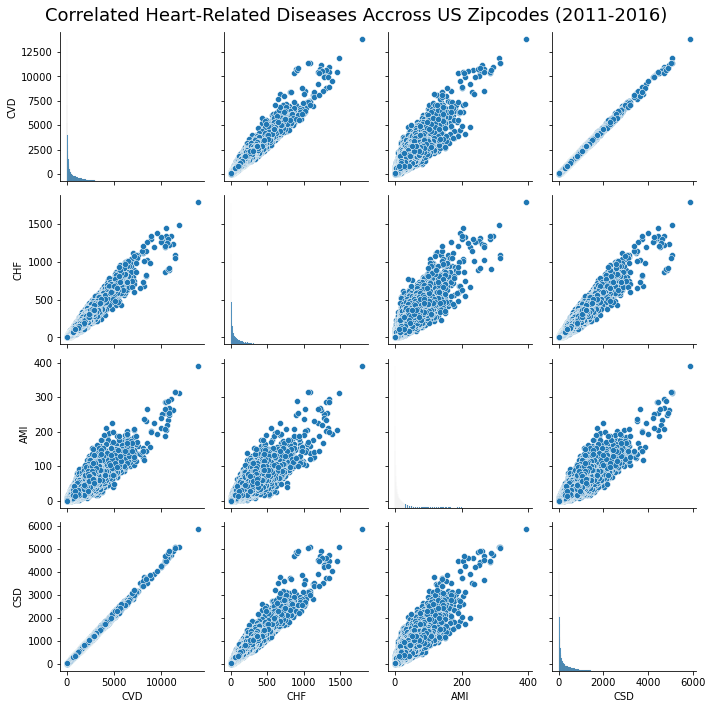

In [4]:
heart_icd = ['CVD_pdx2dx_25','CHF_pdx2dx_25','AMI_pdx2dx_25','CSD_pdx2dx_25']
replacements = {'CVD_pdx2dx_25': 'CVD', 'CHF_pdx2dx_25': 'CHF',
                'AMI_pdx2dx_25': 'AMI', 'CSD_pdx2dx_25': 'CSD'}

g =  sns.pairplot(df_yearly[heart_icd])
for i in range(4):
    for j in range(4):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
plt.suptitle('Correlated Heart-Related Diseases Accross US Zipcodes (2011-2016)',fontsize=18)
plt.tight_layout()
plt.savefig('cvd_pairplot.png')
plt.show()

### Age

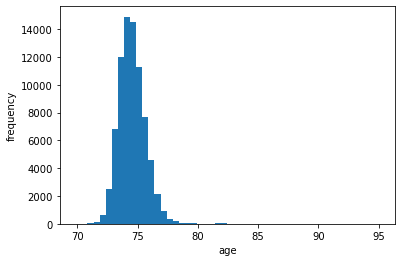

In [11]:
plt.hist(df_yearly.age.values, bins=50)
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

Predictors I would expect to be important in predicting deaths

In [5]:
df_years = df_yearly[['AYEAR','CVD_pdx2dx_25','COPD_pdx2dx_25','DM_pdx2dx_25','ICU_DAY','death']].groupby('AYEAR').mean()

In [9]:
max(df_yearly.death)

1026

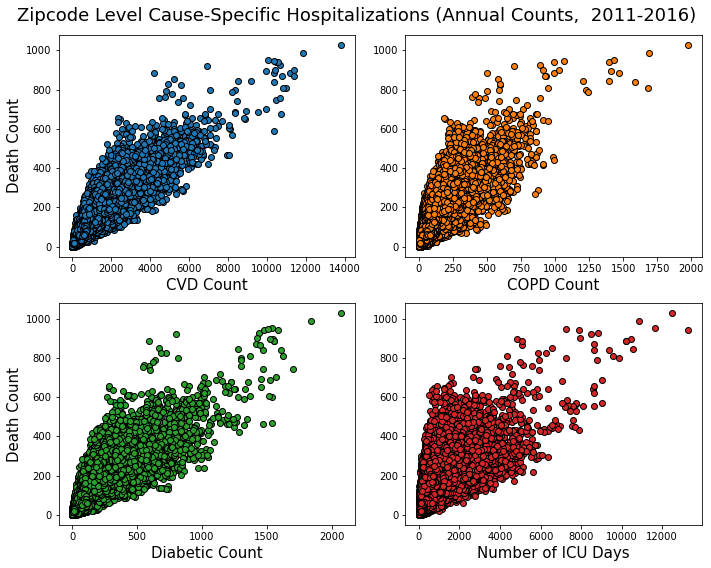

In [32]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

f, axes = plt.subplots(2,2, figsize=(10, 8))
axes = axes.ravel()

axes[0].scatter(df_yearly['CVD_pdx2dx_25'], df_yearly['death'], c=colors[0],edgecolors='black')
axes[0].set_xlabel('CVD Count',fontsize=15)
axes[0].set_ylabel('Death Count',fontsize=15)

axes[1].scatter(df_yearly['COPD_pdx2dx_25'], df_yearly['death'], c=colors[1],edgecolors='black')
axes[1].set_xlabel('COPD Count',fontsize=15)
# axes[1].set_ylabel('Death Count')

axes[2].scatter(df_yearly['DM_pdx2dx_25'], df_yearly['death'],c=colors[2],edgecolors='black')
axes[2].set_xlabel('Diabetic Count',fontsize=15)
axes[2].set_ylabel('Death Count',fontsize=15)

axes[3].scatter(df_yearly['ICU_DAY'], df_yearly['death'],c=colors[3],edgecolors='black')
axes[3].set_xlabel('Number of ICU Days',fontsize=15)
# axes[3].set_ylabel('Average Death Count')

plt.suptitle('Zipcode Level Cause-Specific Hospitalizations (Annual Counts,  2011-2016)',fontsize=18)
plt.tight_layout()
# plt.ylabel('Death Count')
f.savefig('icd9_scatter_plot.png')
plt.show()

In [16]:
df_monthly = pd.read_csv('../data/merged_df3_monthly.csv')

In [20]:
np.unique(df_monthly.zip).shape,np.unique(df_yearly.zip).shape

((30322,), (30322,))

In [21]:
df_deaths = pd.DataFrame(df_monthly.groupby(['year','month'])['deaths'].sum()).reset_index()

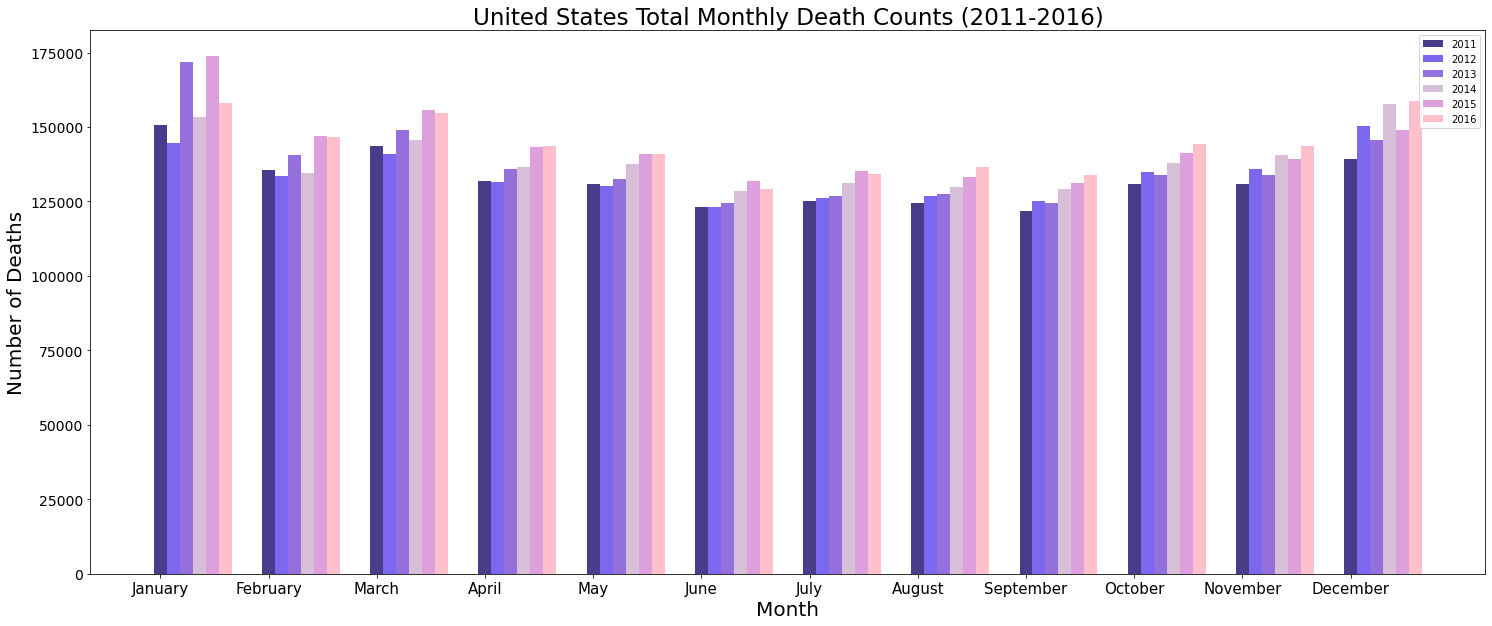

In [30]:
yrs = [2011,2012,2013,2014,2015,2016]
cs=['darkslateblue','mediumslateblue','mediumpurple','thistle','plum','pink']
barWidth  = 0.12
barWidth2  = 0.12

plt.figure(figsize=(25,10))
for y,c in zip(yrs,cs):
    df_sub=df_deaths[df_deaths.year==y]
    
    if y==2011:
        x=df_sub.month
    else:
        x = [r + barWidth2 for r in range(1,13)]
        barWidth2+=barWidth
    plt.bar(x, df_sub.deaths, width=barWidth, label=y,color=c)
plt.xticks(range(1,13),labels=['January','February','March','April','May','June','July',
                               'August','September','October','November','December'],fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Number of Deaths',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.title('United States Total Monthly Death Counts (2011-2016)',fontsize=23)
plt.legend(loc='upper right')
plt.savefig('yearly_deaths.png',dpi=300)
plt.show()

## Exposure

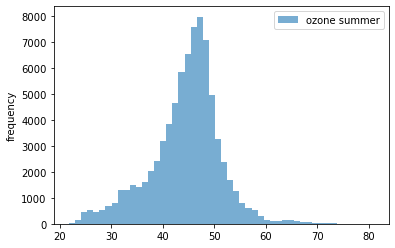

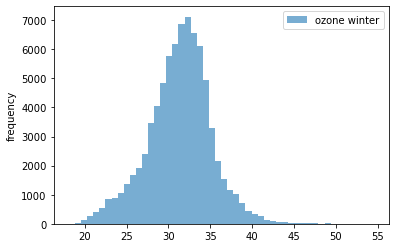

In [18]:
plt.hist(df_yearly.ozone_summer_4y_avg.values, bins=50, alpha=0.6, label='ozone summer')
# plt.hist(df.pm25_nn.values, bins=50, color='green', alpha=0.2, label='pm25')
plt.ylabel("frequency")
plt.legend()
plt.show()

plt.hist(df_yearly.ozone_winter_4y_avg.values, bins=50, alpha=0.6, label='ozone winter')
# plt.hist(df.pm25_nn.values, bins=50, color='green', alpha=0.2, label='pm25')
plt.ylabel("frequency")
plt.legend()
plt.show()

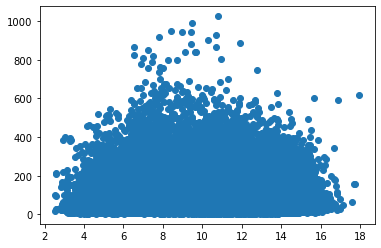

In [19]:
'''
'pm25_summer_4y_avg', 'pm25_winter_4y_avg', 'pm25_fall_4y_avg', 'pm25_spring_4y_avg',
'ozone_summer_4y_avg', 'ozone_winter_4y_avg', 'ozone_fall_4y_avg',
'ozone_spring_4y_avg', 'no2_summer_4y_avg', 'no2_winter_4y_avg',
'no2_fall_4y_avg', 'no2_spring_4y_avg', 'summer_tmmx_4y_avg',
'summer_rmax_4y_avg', 'winter_tmmx_4y_avg', 'winter_rmax_4y_avg'
'''

plt.scatter(df_yearly.pm25_summer_4y_avg, df_yearly.death)

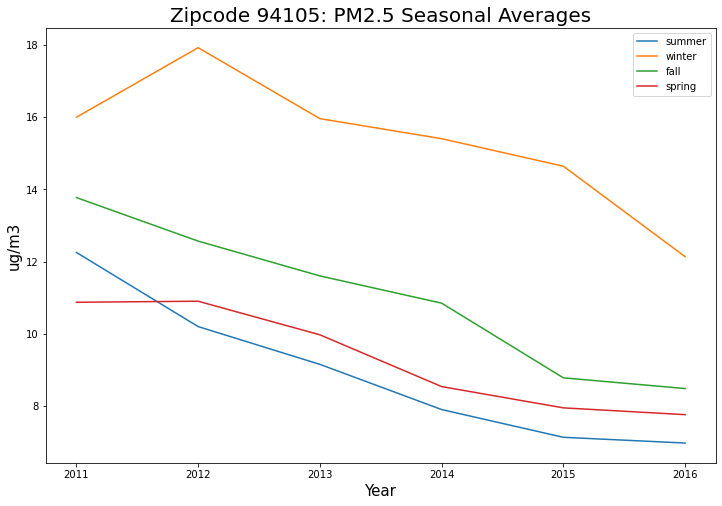

In [29]:
# santa rosa, CA - one of  zips most affected by forest fires
df_544 = df_yearly[df_yearly.zip==94105]
cols_to_plot = ['AYEAR','pm25_summer_4y_avg','population',
       'pm25_winter_4y_avg', 'pm25_fall_4y_avg', 'pm25_spring_4y_avg',
       'ozone_summer_4y_avg', 'ozone_winter_4y_avg', 'ozone_fall_4y_avg',
       'ozone_spring_4y_avg', 'no2_summer_4y_avg', 'no2_winter_4y_avg',
       'no2_fall_4y_avg', 'no2_spring_4y_avg', 'summer_tmmx_4y_avg',
       'summer_rmax_4y_avg', 'winter_tmmx_4y_avg', 'winter_rmax_4y_avg', 'death']

f,ax = plt.subplots(1,figsize=(12,8)) 
ax.plot(df_544['AYEAR'], df_544['pm25_summer_4y_avg'], label='summer')
ax.plot(df_544['AYEAR'], df_544 ['pm25_winter_4y_avg'], label='winter')
ax.plot(df_544['AYEAR'], df_544['pm25_fall_4y_avg'], label='fall')
ax.plot(df_544['AYEAR'], df_544['pm25_spring_4y_avg'], label='spring')
ax.set_xticks(range(2011,2017))
ax.set_title('Zipcode 94105: PM2.5 Seasonal Averages',fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('ug/m3', fontsize=15)
plt.legend()
f.savefig('us_pm25_94105.png')
plt.show() 


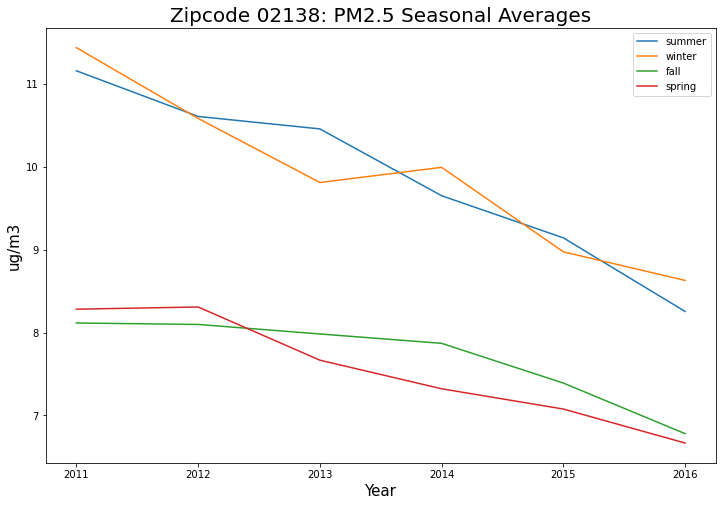

In [30]:
df_544 = df_yearly[df_yearly.zip== 2138]
cols_to_plot = ['AYEAR','pm25_summer_4y_avg','population',
       'pm25_winter_4y_avg', 'pm25_fall_4y_avg', 'pm25_spring_4y_avg',
       'ozone_summer_4y_avg', 'ozone_winter_4y_avg', 'ozone_fall_4y_avg',
       'ozone_spring_4y_avg', 'no2_summer_4y_avg', 'no2_winter_4y_avg',
       'no2_fall_4y_avg', 'no2_spring_4y_avg', 'summer_tmmx_4y_avg',
       'summer_rmax_4y_avg', 'winter_tmmx_4y_avg', 'winter_rmax_4y_avg', 'death']

f,ax = plt.subplots(1,figsize=(12,8)) 
ax.plot(df_544['AYEAR'], df_544['pm25_summer_4y_avg'], label='summer')
ax.plot(df_544['AYEAR'], df_544 ['pm25_winter_4y_avg'], label='winter')
ax.plot(df_544['AYEAR'], df_544['pm25_fall_4y_avg'], label='fall')
ax.plot(df_544['AYEAR'], df_544['pm25_spring_4y_avg'], label='spring')
# plt.hlines(y=12, xmin=2011, xmax=2016, linestyles='dashed')
ax.set_xticks(range(2011,2017))
ax.set_title('Zipcode 02138: PM2.5 Seasonal Averages', fontsize=20)
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('ug/m3',fontsize=15)
plt.legend()
f.savefig('us_pm25_2138.png')
plt.show() 

### Groupby state
- visualize state trends

In [8]:
state_agg = pd.read_csv('state_nerged_aggregated_.csv').drop(columns=['Unnamed: 0'])

In [9]:
# state_agg.columns
cols_to_plot = ['age', 'pm25_nn', 'ozone',
       'poverty', 'popdensity', 'medianhousevalue', 'pct_blk',
       'medhouseholdincome', 'pct_owner_occ', 'hispanic', 'education',
       'smoke_rate', 'mean_bmi', 'tmmx', 'rmax', 'pr']
# sns.pairplot(state_agg[cols_to_plot])

In [10]:
state_agg_2011 = state_agg[state_agg.AYEAR == 2011]
state_agg_2012 = state_agg[state_agg.AYEAR == 2012]
state_agg_2011.shape, state_agg_2012.shape

((31171, 70), (31100, 70))

In [11]:
def plot_bar(x_col,y_col,x_lab,y_lab,ts):
    state_dfs = [state_agg_2011,state_agg_2012]
    for i in range(len(ts)):
        plt.figure(figsize=(14,6))
        # make barplot and sort bars
        sns.barplot(x=x_col,
                    y=y_col, 
                    data=state_dfs[i], 
                    order=state_dfs[i].sort_values(by=y_col,ascending=False)[x_col],
                    color='blue')
        # set labels
        plt.xlabel(x_lab, size=15)
        plt.ylabel(y_lab, size=15)
        plt.title(ts[i], size=18)
        plt.tight_layout()

In [7]:
# plot_bar('statecode','population','State','Population',["State-wide Population 2011","State-wide Population 2012"])

In [9]:
# print(state_agg_2011[state_agg_2011['statecode']=='VT'].population)
# print(state_agg_2011[state_agg_2011['statecode']=='DC'].population)

In [12]:
# mean exposure
# plot_bar('statecode','pm25_summer_4y_avg','State','Exposure Level (ppm)',["State-Wide Mean Exposure 2011","State-Wide Mean Exposure 2012"])

In [13]:
# mean exposure
# plot_bar('statecode','medhouseholdincome','State','Med Household Income ($)',["State-Wide Average Median Household Income 2011","State-Wide Average Median Household Income 2012"])

In [14]:
# mean exposure
# plot_bar('statecode','poverty','State','% Poverty',["Zipcode Average % Living below Poverty Line 2011","Zipcode Average % Living below Poverty Line 2012"])

In [15]:
# the state with high med household income and high poverty
# state_agg[(state_agg['medhouseholdincome'] > 70000) & (state_agg['poverty'] > 0.1)]

Washington D.C. has high median household income, but also 2nd highest poverty rate (average over 2011 - 2012).

Top five states with most number of deaths within 2010-2011: California, Florida, New York, Texas, Pensylvania.

Five states with lowest number of deaths: Deleware, Rhode Island, North Dakota, Wyoming, DC.

**Interesting**: DC has high medhousehold income, high poverty, but lowest number of deaths within 2011-2012.

Moving forward to work with a subset of states, I may choose the five states with the highest number of deaths.

### Looking at diagnosis codes

In [ ]:
plot_bar('statecode','ICU_DAY','State','ICU Day Count',["Number of ICU Days 2011","Number of ICU Days 2012"])

In [ ]:
cols = ['ICU_DAY','CCI_DAY','CVD_pdx2dx_25','Parkinson_pdx2dx_25',
       'Alzheimer_pdx2dx_25', 'Dementia_pdx2dx_25', 'CHF_pdx2dx_25',
       'AMI_pdx2dx_25', 'COPD_pdx2dx_25', 'DM_pdx2dx_25', 'Stroke_pdx2dx_25',
       'CVD_pdx2dx_25', 'CSD_pdx2dx_25', 'Ischemic_stroke_pdx2dx_25',
       'Hemo_Stroke_pdx2dx_25', 'neo_140_149', 'neo_150_159', 'neo_160_165',
       'neo_170_176', 'neo_179_189', 'neo_190_199', 'neo_200_209',
       'neo_210_229', 'neo_230_234', 'neo_235_238', 'neo_239', 'pm25_summer',
       'pm25_winter', 'ozone_summer','ozone_winter', 'no2_summer',
       'no2_winter', 'winter_tmmx', 'summer_tmmx', 'winter_rmax','summer_rmax']

# average of previous 10 years of pm,ozone could see more of an effect (zipcodes over decades)
for i in range(len(cols)):
    if cols[i] ==  'CVD_pdx2dx_25':
        plot_scatter(state_agg_2011,state_agg_2012,cols[i],'death','CVD Count','Death Count','Zipcode Level CVD vs Death Count')

In [ ]:
# https://www.actuaries.org/CTTEES_TFM/Documents/Booth_Tickle.pdf

In [10]:
def plot_scatter(df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,x_col,y_col,x_lab,y_lab,title):
    plt.scatter(df_2011[x_col], df_2011[y_col],label='2011')
    plt.scatter(df_2012[x_col], df_2012[y_col],label='2012')
    plt.scatter(df_2013[x_col], df_2013[y_col],label='2013')
    plt.scatter(df_2014[x_col], df_2014[y_col],label='2014')
    plt.scatter(df_2015[x_col], df_2015[y_col],label='2015')
    plt.scatter(df_2016[x_col], df_2016[y_col],label='2016')
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.legend()
    plt.show()
    
#plot_scatter('medhouseholdincome','poverty','median household income','% living below poverty line','State Ave Medhouseincome vs poverty')    

## Group by Zipcode, year

In [11]:
zip_train = pd.read_csv('zip_train_v2.csv')
zip_test = pd.read_csv('zip_test_v2.csv')

In [12]:
cols_to_plot = ['zip','CVD_pdx2dx_25', 'ICU_DAY', 'COPD_pdx2dx_25','neo_150_159', 'death']

df_sub = pd.concat((zip_train, zip_test))[cols_to_plot].groupby('zip').mean()

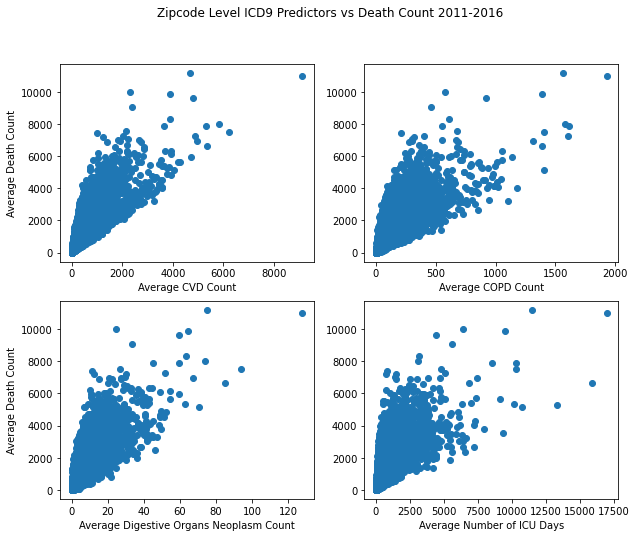

In [13]:
f, axes = plt.subplots(2,2, figsize=(10, 8))
axes = axes.ravel()

axes[0].scatter(df_sub['CVD_pdx2dx_25'], df_sub['death'])
axes[0].set_xlabel('Average CVD Count')
axes[0].set_ylabel('Average Death Count')

axes[1].scatter(df_sub['COPD_pdx2dx_25'], df_sub['death'])
axes[1].set_xlabel('Average COPD Count')
# axes[1].set_ylabel('Average Death Count')

axes[2].scatter(df_sub['neo_150_159'], df_sub['death'])
axes[2].set_xlabel('Average Digestive Organs Neoplasm Count')
axes[2].set_ylabel('Average Death Count')

axes[3].scatter(df_sub['ICU_DAY'], df_sub['death'])
axes[3].set_xlabel('Average Number of ICU Days')
# axes[3].set_ylabel('Average Death Count')

plt.suptitle('Zipcode Level ICD9 Predictors vs Death Count 2011-2016')
f.savefig('icd9_scatter_plot.png')
plt.show()

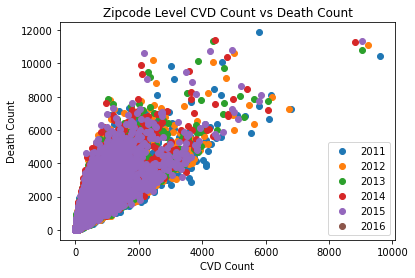

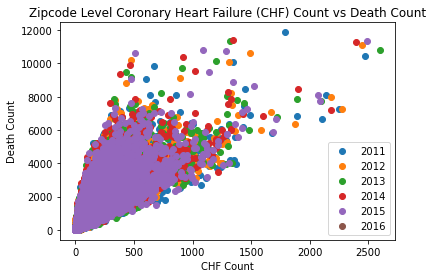

In [14]:
zip_agg_2011 = zip_train[zip_train['AYEAR'] == 2011]
zip_agg_2012 = zip_train[zip_train['AYEAR'] == 2012]
zip_agg_2013 = zip_train[zip_train['AYEAR'] == 2013]
zip_agg_2014 = zip_train[zip_train['AYEAR'] == 2014]
zip_agg_2015 = zip_train[zip_train['AYEAR'] == 2015]
zip_agg_2016 = zip_test[zip_test['AYEAR'] == 2016]

cols = ['ICU_DAY','CCI_DAY','CVD_pdx2dx_25','Parkinson_pdx2dx_25',
       'Alzheimer_pdx2dx_25', 'Dementia_pdx2dx_25', 'CHF_pdx2dx_25',
       'AMI_pdx2dx_25', 'COPD_pdx2dx_25', 'DM_pdx2dx_25', 'Stroke_pdx2dx_25',
       'CSD_pdx2dx_25', 'Ischemic_stroke_pdx2dx_25',
       'Hemo_Stroke_pdx2dx_25', 'neo_140_149', 'neo_150_159', 'neo_160_165',
       'neo_170_176', 'neo_179_189', 'neo_190_199', 'neo_200_209',
       'neo_210_229', 'neo_230_234', 'neo_235_238', 'neo_239', 'pm25_summer',
       'pm25_winter', 'ozone_summer','ozone_winter', 'no2_summer',
       'no2_winter', 'winter_tmmx', 'summer_tmmx', 'winter_rmax','summer_rmax']

# average of previous 10 years of pm,ozone could see more of an effect (zipcodes over decades)
#     df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,x_col,y_col,x_lab,y_lab,titl
for i in range(len(cols)):
#     plot_scatter(cols[i],'dead',cols[i],'Death Count','State Aggregated')
    if cols[i] ==  'CVD_pdx2dx_25':
        plot_scatter(zip_agg_2011,zip_agg_2012,zip_agg_2013,zip_agg_2014,zip_agg_2015,zip_agg_2016,cols[i],
                     'death','CVD Count','Death Count','Zipcode Level CVD Count vs Death Count')
    if cols[i] ==  'CHF_pdx2dx_25':
        plot_scatter(zip_agg_2011,zip_agg_2012,zip_agg_2013,zip_agg_2014,zip_agg_2015,zip_agg_2016,cols[i],
                     'death','CHF Count','Death Count','Zipcode Level Coronary Heart Failure (CHF) Count vs Death Count')

## Group by Year

In [16]:
cols_to_plot = ['AYEAR','pm25_summer_4y_avg','population',
       'pm25_winter_4y_avg', 'pm25_fall_4y_avg', 'pm25_spring_4y_avg',
       'ozone_summer_4y_avg', 'ozone_winter_4y_avg', 'ozone_fall_4y_avg',
       'ozone_spring_4y_avg', 'no2_summer_4y_avg', 'no2_winter_4y_avg',
       'no2_fall_4y_avg', 'no2_spring_4y_avg', 'summer_tmmx_4y_avg',
       'summer_rmax_4y_avg', 'winter_tmmx_4y_avg', 'winter_rmax_4y_avg', 'death']

df_sub2 = pd.concat((zip_train, zip_test))[cols_to_plot].groupby('AYEAR').mean().reset_index()

f,ax = plt.subplots(1,figsize=(8,5)) 
ax.plot(np.array([2012,2013,2014,2015,2016]), (df_sub2['death']/df_sub2['population']).values[:-1])
plt.xticks(ticks=[2012,2013,2014,2015,2016])
ax.set_title('US Yearly Mortality Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Death Count / Total Population')
plt.show()
f.savefig('us_mortality_rates.png')

f,ax = plt.subplots(1,figsize=(8,5)) 
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_summer_4y_avg'], label='summer')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_winter_4y_avg'], label='winter')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_fall_4y_avg'], label='fall')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_spring_4y_avg'], label='spring')
# plt.hlines(y=12, xmin=2011, xmax=2016, linestyles='dashed')
ax.set_title('United States PM2.5 Average')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration, ug/m3')
plt.legend()
plt.show() 
f.savefig('us_yearly_pm25.png')

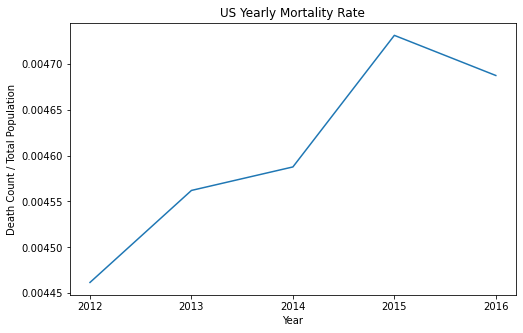

In [19]:
f,ax = plt.subplots(1,figsize=(8,5)) 
ax.plot(np.array([2012,2013,2014,2015,2016]), (df_sub2['death']/df_sub2['population']).values[:-1])
plt.xticks(ticks=[2012,2013,2014,2015,2016])
ax.set_title('US Yearly Mortality Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Death Count / Total Population')
plt.show()
f.savefig('us_mortality_rates.png')

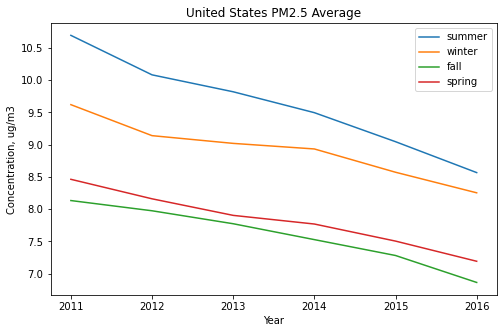

In [14]:
f,ax = plt.subplots(1,figsize=(8,5)) 
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_summer_4y_avg'], label='summer')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_winter_4y_avg'], label='winter')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_fall_4y_avg'], label='fall')
ax.plot(df_sub2['AYEAR'], df_sub2['pm25_spring_4y_avg'], label='spring')
# plt.hlines(y=12, xmin=2011, xmax=2016, linestyles='dashed')
ax.set_title('United States PM2.5 Average')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration, ug/m3')
plt.legend()
plt.show() 
f.savefig('us_yearly_pm25.png')

In [ ]:
titles = ['pm25', 'no2', 'ozone', 'temperature', 'humidity']

for j,i in enumerate([['pm25_winter','pm25_summer'], ['no2_winter','no2_summer'],
          ['ozone_winter','ozone_summer'], ['winter_tmmx','summer_tmmx'],
          ['winter_rmax','summer_rmax']]):
    plt.plot(year_agg['AYEAR'], year_agg[i[0]], label=i[0])
    plt.plot(year_agg['AYEAR'], year_agg[i[1]], label=i[1])
    plt.xlabel('Year')
#     plt.ylabel(i)
    plt.title(titles[j])
    plt.legend()
    plt.show()

Look at California yearly (highest death count on yearly average)

In [ ]:
ca_df = df[df.statecode=='CA']
fl_df = df[df.statecode=='FL']
tx_df = df[df.statecode=='TX']

In [ ]:
ca_yearly = ca_df.groupby(['AYEAR']).aggregate(col_to_agg2)
ca_yearly = ca_yearly.reset_index()

fl_yearly = fl_df.groupby(['AYEAR']).aggregate(col_to_agg2)
fl_yearly = fl_yearly.reset_index()

tx_yearly = tx_df.groupby(['AYEAR']).aggregate(col_to_agg2)
tx_yearly = tx_yearly.reset_index()

In [ ]:
titles = ['pm25', 'no2', 'ozone', 'temperature', 'humidity']

for j,i in enumerate([['pm25_winter','pm25_summer'], ['no2_winter','no2_summer'],
          ['ozone_winter','ozone_summer'], ['winter_tmmx','summer_tmmx'],
          ['winter_rmax','summer_rmax']]):
    plt.plot(ca_yearly['AYEAR'], ca_yearly[i[0]], label=i[0])
    plt.plot(ca_yearly['AYEAR'], ca_yearly[i[1]], label=i[1])
    plt.xlabel('Year')
#     plt.ylabel(i)
    plt.title('CA '+ titles[j])
    plt.legend()
    plt.show()

In [ ]:
labs = ['CA', 'FL', 'TX']
for i,df in enumerate([ca_yearly, fl_yearly, tx_yearly]):
    plt.plot(df['AYEAR'], df['death'], label=labs[i])
    plt.xlabel('Year')
    plt.ylabel('Deaths (count)')
    plt.title('States with Highest Yearly Death Count')
    plt.legend()
plt.show()

In [ ]:
df.shape